In [41]:
import random
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model

data = pd.read_csv('Folds5x2_pp.csv')
X = data[['AT','V','AP','RH']]
X.head()
y = data[['PE']]
y.head()

from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
print('{} {} {} {}'.format(X_train.shape, y_train.shape, X_test.shape, y_test.shape))

from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

print(linreg.intercept_)
print(linreg.coef_)

(7176, 4) (7176, 1) (2392, 4) (2392, 1)
[ 447.06297099]
[[-1.97376045 -0.23229086  0.0693515  -0.15806957]]


In [42]:
y_pred = linreg.predict(X_test)

from sklearn import metrics
print('MSE: {}'.format(metrics.mean_squared_error(y_test, y_pred)))
print('RMSE: {}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))

MSE: 20.080401202073904
RMSE: 4.481116066570236


In [45]:
X = data[['AT', 'V', 'AP', 'RH']]
y = data[['PE']]
from sklearn.model_selection import cross_val_predict
predicted = cross_val_predict(linreg, X, y, cv=10)
print('MSE: {}'.format(metrics.mean_squared_error(y, predicted)))
print('RMSE: {}'.format(np.sqrt(metrics.mean_squared_error(y, predicted))))

MSE: 20.79559746194311
RMSE: 4.560219014690316


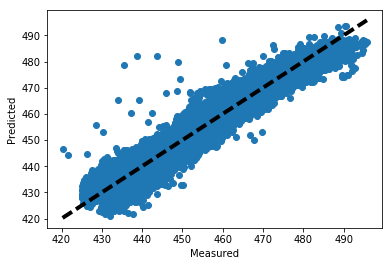

In [46]:
fig, ax = plt.subplots()
ax.scatter(y, predicted)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()